In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from adjustText import adjust_text
import os

In [49]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_d10LVM")

In [50]:
LRTable = pd.read_csv("Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv", sep="\t")

ylim=(0, max(-np.log10(LRTable["PValue.adj"].tolist()))*1.05)

In [51]:
LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)
LRTable

,SeqID,Pos,Strand,logFC,logCPM,LR,PValue,PValue.adj,MatchedFeatureType,MatchedFeatureID,MatchedFeatureGene,MatchedFeatureDescription,MatchedFeatureStart,MatchedFeatureEnd,MatchedFeatureStrand
0,NC_000913.3,4175421,+,6.875796,9.097454,3.683558e+02,4.267687e-82,3.185316e-77,tRNA,rna160,thrU,tRNA-Thr,4175388,4175463,+
1,NC_000913.3,696583,-,7.037012,6.647123,3.517807e+02,1.735264e-78,6.475830e-74,tRNA,rna17,glnV,tRNA-Gln,696542,696616,-
2,NC_000913.3,4209809,+,5.453130,6.332257,3.098131e+02,2.398479e-69,5.967257e-65,tRNA,rna166,gltV,tRNA-Glu,4209774,4209849,+
3,NC_000913.3,780588,+,5.490546,7.170254,3.038508e+02,4.773518e-68,8.907146e-64,tRNA,rna23,lysT,tRNA-Lys,780554,780629,+
4,NC_000913.3,3943470,+,5.458903,6.277452,2.945989e+02,4.949006e-66,7.387678e-62,tRNA,rna136,gltU,tRNA-Glu,3943435,3943510,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61824,NC_000913.3,3308059,-,0.000059,0.461245,8.373481e-09,9.999270e-01,9.999606e-01,CDS,cds3151,nlpI,lipoprotein NlpI,3308040,3308924,-
61825,NC_000913.3,3425993,-,0.000023,5.232855,6.581285e-09,9.999353e-01,9.999606e-01,rRNA,rna120,rrlD,23S ribosomal RNA,3423880,3426783,-
61822,NC_000913.3,962329,+,0.000033,2.227758,3.730250e-09,9.999513e-01,9.999606e-01,CDS,cds901,rpsA,30S ribosomal subunit protein S1,961995,963668,+
61823,NC_000913.3,3942527,+,-0.000030,4.237424,7.867758e-09,9.999292e-01,9.999606e-01,rRNA,rna135,rrsC,16S ribosomal RNA,3941808,3943349,+


tRNA
CDS


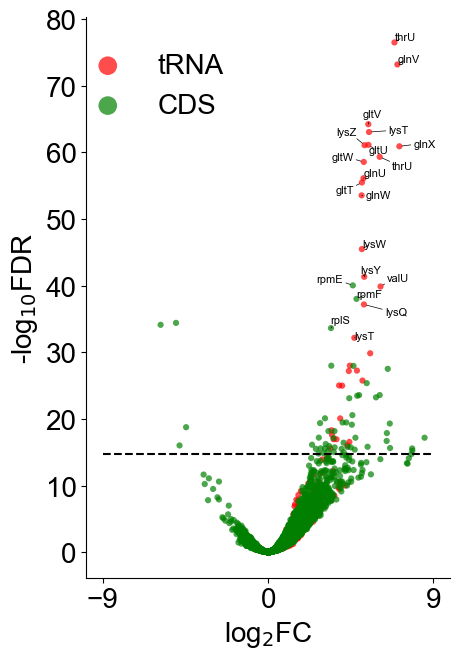

In [52]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))
top_N_cutoff = 100

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "CDS" : "green"}
dots_size=20
transparency=0.7

#features_list = set(WT_LRTable["MatchedFeatureType"].tolist()+LRTable["MatchedFeatureType"].tolist())

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable[LRTable.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable[LRTable.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)

SelectedFeatures = LRTable.query("logFC > 0")[0:20]
SelectedFeatureLabels = []

for x, y, t in zip(SelectedFeatures["logFC"], 
                   -np.log10(SelectedFeatures["PValue.adj"]), 
                   SelectedFeatures["MatchedFeatureGene"]):
    SelectedFeatureLabels.append(LRT_volcano.text(x, y, t, size=8))

adjust_text(SelectedFeatureLabels, force_points=0.1, force_text=0.1,
            expand_points=(1, 1), expand_text=(1.6, 1.6),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)

hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))
LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)
LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])


handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig("Results/Pictures/Ecd10LVM_volcano_plot.png", 
               bbox_inches='tight',
               dpi=300)

tRNA
rRNA
CDS


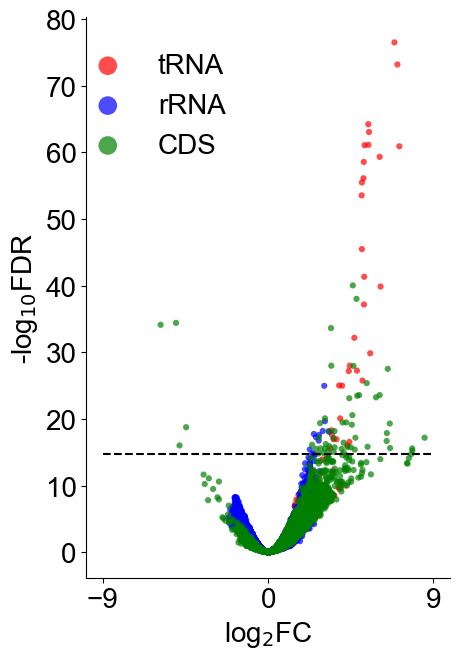

In [56]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))
top_N_cutoff = 100

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "rRNA" : "blue", "CDS" : "green"}
dots_size=20
transparency=0.7

#features_list = set(WT_LRTable["MatchedFeatureType"].tolist()+LRTable["MatchedFeatureType"].tolist())

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable[LRTable.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable[LRTable.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)

# SelectedFeatures = LRTable.query("logFC > 0")[0:20]
# SelectedFeatureLabels = []

# for x, y, t in zip(SelectedFeatures["logFC"], 
#                    -np.log10(SelectedFeatures["PValue.adj"]), 
#                    SelectedFeatures["MatchedFeatureGene"]):
#     SelectedFeatureLabels.append(LRT_volcano.text(x, y, t, size=8))

# adjust_text(SelectedFeatureLabels, force_points=0.1, force_text=0.1,
#             expand_points=(1, 1), expand_text=(1.6, 1.6),
#             arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)

hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))

LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)

LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])


handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig("Results/Pictures/Ecd10LVM_volcano_plot_without_labels.png", 
               bbox_inches='tight',
               dpi=300)

#TODO: add horizontal line below top-100 points
#TODO: change colors for anticodon-located TCS

tRNA
CDS
other


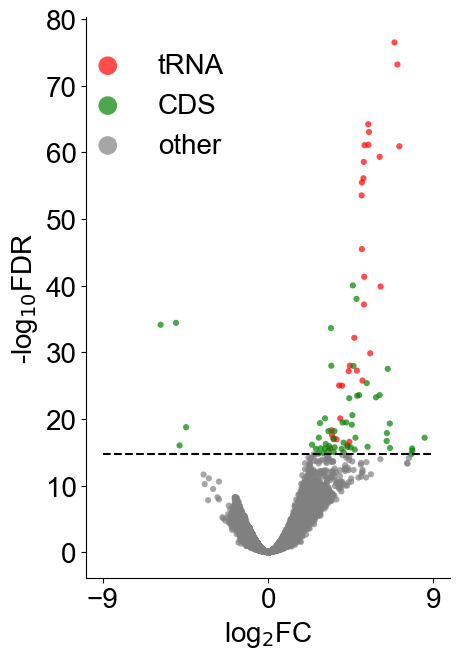

In [45]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "CDS" : "green", "other" : "grey"}
dots_size=20
transparency=0.7

top_N_cutoff = 100
LRTable_modified = LRTable
LRTable_modified.loc[LRTable_modified[top_N_cutoff+1::].index, "MatchedFeatureType"] = "other"

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable_modified[LRTable_modified.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable_modified[LRTable_modified.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)
    
hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))

LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)

LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)


handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,0.93), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig(f"Results/Pictures/Ecd10LVM_volcano_plot_without_labels_top_{top_N_cutoff}_colored.png", 
               bbox_inches='tight',
               dpi=300)

In [43]:
from collections import Counter

In [44]:
Counter(LRTable_modified[0:top_N_cutoff]["MatchedFeatureType"])

Counter({'tRNA': 32, 'CDS': 52, 'rRNA': 10, 'ncRNA': 6})

In [17]:
min(LRTable["logFC"])

-5.85341443977433